In [75]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [76]:
Train_df= pd.read_csv('train.csv')
Test_df= pd.read_csv('Test_df.csv')

In [77]:
Test_df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [78]:
Train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [79]:
Train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [80]:
Train_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [81]:
Train_df.shape

(891, 12)

In [82]:
Train_df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [83]:
Train_df['Age'].isnull().sum()

177

In [84]:
Train_df.Age.median()

28.0

In [85]:
Train_df['Age'].fillna(Train_df.Age.median(), inplace=True)

In [86]:
Train_df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [87]:
import re
deck = {'A': 1, 'B': 2, 'C': 3, 'D': 4, 'E': 5, 'F': 6, 'G': 7, 'U': 8}
data = [Train_df, Test_df]

for dataset in data:
    dataset['Cabin'] = dataset['Cabin'].fillna('U0')
    dataset['Deck'] = dataset['Cabin'].map(lambda x: re.compile('([a-zA-Z]+)').search(x).group())
    dataset['Deck'] = dataset['Deck'].map(deck)
    dataset['Deck'] = dataset['Deck'].fillna(0)
    dataset['Deck'] = dataset['Deck'].astype(int)
# we can now drop the cabin feature
Train_df = Train_df.drop(['Cabin'], axis=1)
Test_df = Test_df.drop(['Cabin'], axis=1)

In [88]:
Train_df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       2
Deck           0
dtype: int64

In [89]:
common_value = 'S'
data = [Train_df, Test_df]

for dataset in data:
    dataset['Embarked'] = dataset['Embarked'].fillna(common_value)

In [90]:
Test_df['Age'].isnull().sum()

86

In [91]:
Test_df.Age.median()

27.0

In [92]:
Test_df['Age'].fillna(Train_df.Age.median(), inplace=True)

In [93]:
# Remove null value in Fare
Test_df[Test_df['Fare'].isna()] = Test_df['Fare'].mean()

In [94]:
Test_df.isnull().sum()

PassengerId    0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
Deck           0
dtype: int64

In [95]:
Train_df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
Deck           0
dtype: int64

In [96]:
Train_df.shape

(891, 12)

In [97]:
Test_df.shape

(418, 11)

In [98]:
Train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Deck
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,8
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,3
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,8
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,3
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,8


In [99]:
data = [Train_df, Test_df]

for dataset in data:
    dataset['Fare'] = dataset['Fare'].fillna(0)
    dataset['Fare'] = dataset['Fare'].astype(int)

In [100]:
genders = {"male": 0, "female": 1}
data = [Train_df, Test_df]

for dataset in data:
    dataset['Sex'] = dataset['Sex'].map(genders)

In [101]:
Train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Deck
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7,S,8
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71,C,3
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7,S,8
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53,S,3
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8,S,8


In [102]:
Test_df['Sex'].isnull().sum()

1

In [103]:
Test_df['Sex'] = Test_df['Sex'].fillna(0)

In [104]:
Test_df['Sex'].isnull().sum()

0

In [105]:
ports = {"S": 0, "C": 1, "Q": 2}
data = [Train_df, Test_df]

for dataset in data:
    dataset['Embarked'] = dataset['Embarked'].map(ports)

In [106]:
Test_df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Deck
0,892.0,3.0,"Kelly, Mr. James",0.0,34.5,0.0,0.0,330911,7,2.0,8.0
1,893.0,3.0,"Wilkes, Mrs. James (Ellen Needs)",1.0,47.0,1.0,0.0,363272,7,0.0,8.0
2,894.0,2.0,"Myles, Mr. Thomas Francis",0.0,62.0,0.0,0.0,240276,9,2.0,8.0
3,895.0,3.0,"Wirz, Mr. Albert",0.0,27.0,0.0,0.0,315154,8,0.0,8.0
4,896.0,3.0,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",1.0,22.0,1.0,1.0,3101298,12,0.0,8.0


In [107]:
Test_df['Embarked'] = Test_df['Embarked'].fillna(0)

In [108]:
Test_df.Embarked=Test_df.Embarked.astype('int')

In [109]:
Test_df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Deck
0,892.0,3.0,"Kelly, Mr. James",0.0,34.5,0.0,0.0,330911,7,2,8.0
1,893.0,3.0,"Wilkes, Mrs. James (Ellen Needs)",1.0,47.0,1.0,0.0,363272,7,0,8.0
2,894.0,2.0,"Myles, Mr. Thomas Francis",0.0,62.0,0.0,0.0,240276,9,2,8.0
3,895.0,3.0,"Wirz, Mr. Albert",0.0,27.0,0.0,0.0,315154,8,0,8.0
4,896.0,3.0,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",1.0,22.0,1.0,1.0,3101298,12,0,8.0


In [110]:
Train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Deck
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7,0,8
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71,1,3
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7,0,8
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53,0,3
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8,0,8


In [111]:
 Test_df.PassengerId=Test_df.PassengerId.astype('int')

In [112]:
 Test_df.Pclass=Test_df.Pclass.astype('int')

In [113]:
 Test_df.Sex=Test_df.Sex.astype('int')

In [114]:
Test_df.Deck=Test_df.Deck.astype('int')

In [115]:
Test_df.head(15)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Deck
0,892,3,"Kelly, Mr. James",0,34.5,0.0,0.0,330911,7,2,8
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",1,47.0,1.0,0.0,363272,7,0,8
2,894,2,"Myles, Mr. Thomas Francis",0,62.0,0.0,0.0,240276,9,2,8
3,895,3,"Wirz, Mr. Albert",0,27.0,0.0,0.0,315154,8,0,8
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",1,22.0,1.0,1.0,3101298,12,0,8
5,897,3,"Svensson, Mr. Johan Cervin",0,14.0,0.0,0.0,7538,9,0,8
6,898,3,"Connolly, Miss. Kate",1,30.0,0.0,0.0,330972,7,2,8
7,899,2,"Caldwell, Mr. Albert Francis",0,26.0,1.0,1.0,248738,29,0,8
8,900,3,"Abrahim, Mrs. Joseph (Sophie Halaut Easu)",1,18.0,0.0,0.0,2657,7,1,8
9,901,3,"Davies, Mr. John Samuel",0,21.0,2.0,0.0,A/4 48871,24,0,8


In [116]:
Test_df.Age=Test_df.Age.astype('int')
Test_df.Parch=Test_df.Parch.astype('int')
Test_df.SibSp=Test_df.SibSp.astype('int')

In [117]:
Train_df.Age=Train_df.Age.astype('int')

In [118]:
# how many labels does each variable has
for col in Test_df.columns:
    print(col,':',len(Test_df[col].unique()),'labels')

PassengerId : 418 labels
Pclass : 4 labels
Name : 418 labels
Sex : 2 labels
Age : 64 labels
SibSp : 8 labels
Parch : 9 labels
Ticket : 363 labels
Fare : 77 labels
Embarked : 3 labels
Deck : 9 labels


In [119]:
# To find most frequent categories in Age 
Test_df.Age.value_counts().sort_values(ascending=False).head(20)

28    94
21    17
22    17
24    17
18    16
30    15
26    13
27    12
23    11
25    11
36    10
29    10
45     9
32     8
20     8
17     7
55     6
31     6
33     6
35     6
Name: Age, dtype: int64

In [120]:
Train_df = Train_df.drop(['Ticket'], axis=1)
Test_df = Test_df.drop(['Ticket'], axis=1)

In [121]:
Train_df = Train_df.drop(['Name'], axis=1)
Test_df = Test_df.drop(['Name'], axis=1)

In [122]:
data = [Train_df, Test_df]
for dataset in data:
    dataset['Age'] = dataset['Age'].astype(int)
    dataset.loc[ dataset['Age'] <= 11, 'Age'] = 0
    dataset.loc[(dataset['Age'] > 11) & (dataset['Age'] <= 18), 'Age'] = 1
    dataset.loc[(dataset['Age'] > 18) & (dataset['Age'] <= 22), 'Age'] = 2
    dataset.loc[(dataset['Age'] > 22) & (dataset['Age'] <= 27), 'Age'] = 3
    dataset.loc[(dataset['Age'] > 27) & (dataset['Age'] <= 33), 'Age'] = 4
    dataset.loc[(dataset['Age'] > 33) & (dataset['Age'] <= 40), 'Age'] = 5
    dataset.loc[(dataset['Age'] > 40) & (dataset['Age'] <= 66), 'Age'] = 6
    dataset.loc[ dataset['Age'] > 66, 'Age'] = 6

In [123]:
data = [Train_df, Test_df]

for dataset in data:
    dataset.loc[ dataset['Fare'] <= 7.91, 'Fare'] = 0
    dataset.loc[(dataset['Fare'] > 7.91) & (dataset['Fare'] <= 14.454), 'Fare'] = 1
    dataset.loc[(dataset['Fare'] > 14.454) & (dataset['Fare'] <= 31), 'Fare']   = 2
    dataset.loc[(dataset['Fare'] > 31) & (dataset['Fare'] <= 99), 'Fare']   = 3
    dataset.loc[(dataset['Fare'] > 99) & (dataset['Fare'] <= 250), 'Fare']   = 4
    dataset.loc[ dataset['Fare'] > 250, 'Fare'] = 5
    dataset['Fare'] = dataset['Fare'].astype(int)

In [124]:
Train_df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Deck
0,1,0,3,0,2,1,0,0,0,8
1,2,1,1,1,5,1,0,3,1,3
2,3,1,3,1,3,0,0,0,0,8
3,4,1,1,1,5,1,0,3,0,3
4,5,0,3,0,5,0,0,1,0,8


In [125]:
Test_df.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Deck
0,892,3,0,5,0,0,0,2,8
1,893,3,1,6,1,0,0,0,8
2,894,2,0,6,0,0,1,2,8
3,895,3,0,3,0,0,1,0,8
4,896,3,1,2,1,1,1,0,8


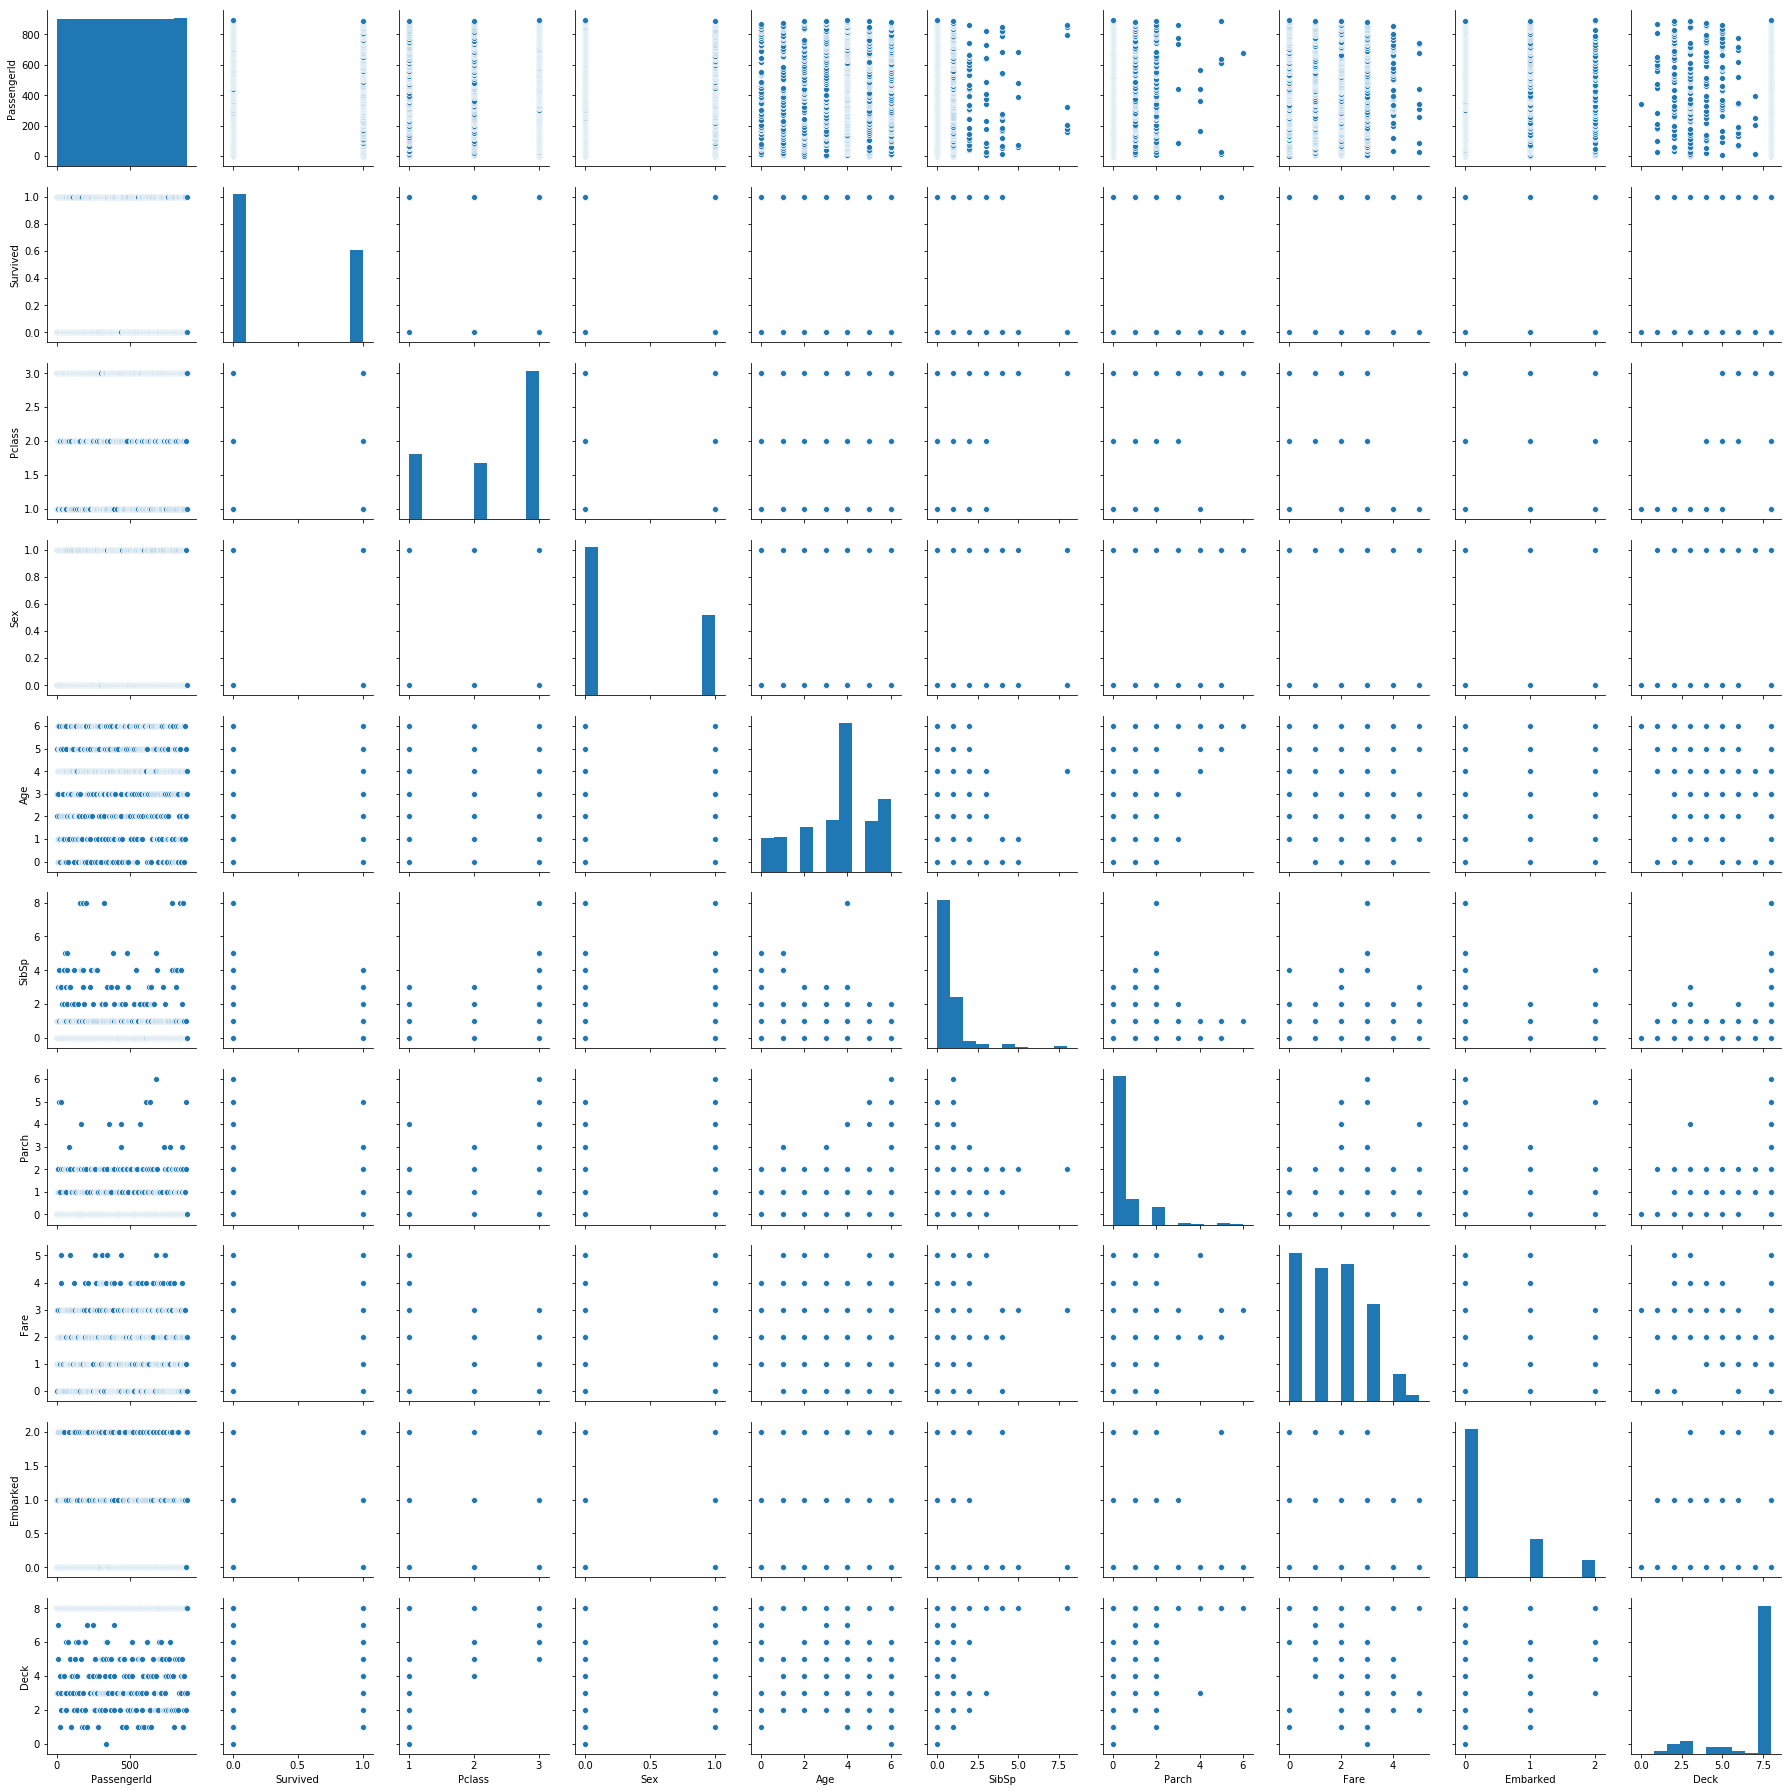

In [53]:
import seaborn as sns
sns.pairplot(Train_df)

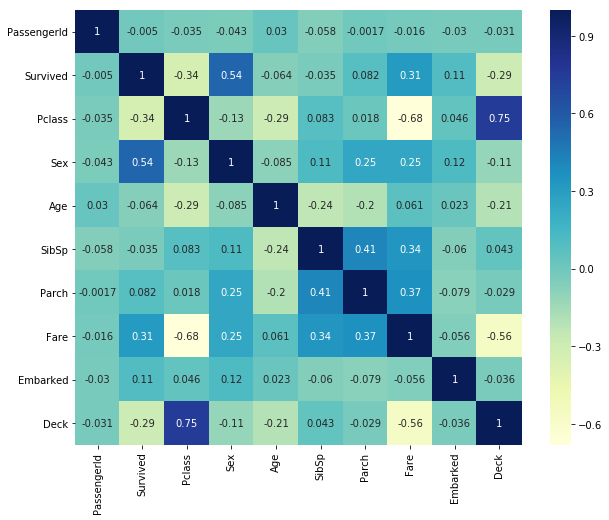

In [54]:
f, ax = plt.subplots(figsize=(10, 8))
ax = sns.heatmap(Train_df.corr(), annot=True, cmap="YlGnBu")

In [126]:
from sklearn.model_selection import train_test_split

In [127]:

X_train, X_test, y_train, y_test = train_test_split(Train_df.drop('Survived', axis=1), Train_df['Survived'], test_size=0.3, random_state=100)

In [128]:
Train_df.shape

(891, 10)

In [129]:
Test_df.shape

(418, 9)

In [66]:
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [67]:
y_pred = log_reg.predict(X_test)

In [69]:
log_reg.score(X_test, y_test)

0.7985074626865671

In [65]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_pred)

array([[140,  19],
       [ 35,  74]], dtype=int64)

In [70]:
from sklearn.ensemble import RandomForestClassifier
random_forest = RandomForestClassifier(n_estimators=100)

C:\Users\Rashmi\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


In [71]:
random_forest.fit(X_train, y_train)

Y_prediction = random_forest.predict(X_test)

random_forest.score(X_train, y_train)
acc_random_forest = round(random_forest.score(X_train, y_train) * 100, 2)

In [73]:
acc_random_forest

100.0